In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import re
import seaborn as sns
%matplotlib inline

In [2]:
#age_group_list = []

#for start, stop in [(14,17), (18,23), (24,30), (31,40), (41,50), (51,60), (60,100)]:
#      age_group_list.append(males[(males.age >= start) & (males.age <= stop)])
# PEMARITL atuscps

In [3]:
def average_minutes(data, activity_code):
    activity_col = "{}".format(activity_code)
    data = data[['weight', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [4]:
respondent = pd.read_csv("atusresp_2013/atusresp_2013.dat")
weight = respondent[["TUCASEID", "TRSPPRES", "TUFINLWGT"]]

activity_sum = pd.read_csv("atussum_2013/atussum_2013.dat")
activity_sum = activity_sum.rename(columns = {"tucaseid": "TUCASEID"})

roster = pd.read_csv("atusrost_2013/atusrost_2013.dat")

activity = pd.read_csv("atusact_2013/atusact_2013.dat")

In [14]:
needed_data = pd.merge(respondent, activity_sum, how="inner", on="TUCASEID")
needed_data = pd.merge(needed_data, weight, how="inner", on="TUCASEID")

In [16]:
needed_data

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107,TRSPPRES,TUFINLWGT
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,3,11899905.662034
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,0,0,1,4447638.009513
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,1,10377056.507734
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,0,0,3,7731257.992805
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,0,0,3,4725269.227067
5,20130101130619,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,3,2372791.046351
6,20130101130658,1,2013,1,-1,-1,-1,-1,-1,-1,...,5,0,0,0,0,0,0,0,3,5671341.270490
7,20130101130670,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,120,0,1,8608413.296903
8,20130101130734,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,0,0,3,1378191.194810
9,20130101130735,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,3,3905483.253032


In [15]:
watching_sports

,weight,sex,marriage_status,age,children,baseball,basketball,billiards,boating,bowling,...,rollerblading,rugby,running,winter_sports,soccer,softball,racing,volleyball,water_sports,wrestling
0,11899905.662034,2,3,22,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4447638.009513,1,1,39,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10377056.507734,2,1,47,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7731257.992805,2,3,50,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4725269.227067,2,3,45,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2372791.046351,2,3,80,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5671341.270490,1,3,72,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8608413.296903,2,1,55,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1378191.194810,2,3,57,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3905483.253032,2,3,27,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
watching_sports = needed_data[["TUFINLWGT", "TESEX", "TRSPPRES", "TEAGE", "TRHHCHILD", 't130202', 't130203', 't130205', 't130206', 't130207', 't130210', 't130213', 't130215', 't130216', 't130218', 't130219', 't130220', 't130221', 't130222', 't130223', 't130224', 't130225', 't130226', 't130227', 't130229', 't130232']]
watching_sports = watching_sports.rename(columns={"TUFINLWGT": "weight", "TESEX": "sex", "TRSPPRES": "marriage_status", "TEAGE": "age", "TRHHCHILD":"children", 't130202': "baseball", 't130203': "basketball", 't130205': "billiards", 't130206': "boating", 't130207': "bowling", 't130210': "equestrian", 't130213': "football", 't130215': "gymnastics", 't130216': "hockey", 't130218': "racquet", 't130219': "rodeo", 't130220': "rollerblading", 't130221': "rugby", 't130222': "running", 't130223': "winter_sports", 't130224': "soccer", 't130225': "softball", 't130226': "racing", 't130227': "volleyball", 't130229': "water_sports", 't130232': "wrestling"})

In [6]:
watching_sports = needed_data[["TUFINLWGT", "TESEX", "TRSPPRES", "TEAGE", "TRHHCHILD", 't130202', 't130203', 't130205', 't130206', 't130207', 't130210', 't130213', 't130215', 't130216', 't130218', 't130219', 't130220', 't130221', 't130222', 't130223', 't130224', 't130225', 't130226', 't130227', 't130229', 't130232']]
watching_sports = watching_sports.rename(columns={"TUFINLWGT": "weight", "TESEX": "sex", "TRSPPRES": "marriage_status", "TEAGE": "age", "TRHHCHILD":"children", 't130202': "baseball", 't130203': "basketball", 't130205': "billiards", 't130206': "boating", 't130207': "bowling", 't130210': "equestrian", 't130213': "football", 't130215': "gymnastics", 't130216': "hockey", 't130218': "racquet", 't130219': "rodeo", 't130220': "rollerblading", 't130221': "rugby", 't130222': "running", 't130223': "winter_sports", 't130224': "soccer", 't130225': "softball", 't130226': "racing", 't130227': "volleyball", 't130229': "water_sports", 't130232': "wrestling"})

baseball = watching_sports[watching_sports["baseball"] > 0]
baseball = baseball[["weight", "sex", "marriage_status", "age", "children", "baseball"]]

basketball = watching_sports[watching_sports["basketball"] > 0]
basketball = basketball[["weight", "sex", "marriage_status", "age", "children", "basketball"]]

billiards = watching_sports[watching_sports["billiards"] > 0]
billiards = billiards[["weight", "sex", "marriage_status", "age", "children", "billiards"]]

boating = watching_sports[watching_sports["boating"] > 0]
boating = boating[["weight", "sex", "marriage_status", "age", "children", "boating"]]

bowling = watching_sports[watching_sports["bowling"] > 0]
bowling = bowling[["weight", "sex", "marriage_status", "age", "children", "bowling"]]

equestrian = watching_sports[watching_sports["equestrian"] > 0]
equestrian = equestrian[["weight", "sex", "marriage_status", "age", "children", "equestrian"]]

football = watching_sports[watching_sports["football"] > 0]
football = football[["weight", "sex", "marriage_status", "age", "children", "football"]]

gymnastics = watching_sports[watching_sports["gymnastics"] > 0]
gymnastics = gymnastics[["weight", "sex", "marriage_status", "age", "children", "gymnastics"]]

hockey = watching_sports[watching_sports["hockey"] > 0]
hockey = hockey[["weight", "sex", "marriage_status", "age", "children", "hockey"]]

racquet = watching_sports[watching_sports["racquet"] > 0]
racquet = racquet[["weight", "sex", "marriage_status", "age", "children", "racquet"]]

rodeo = watching_sports[watching_sports["rodeo"] > 0]
rodeo = rodeo[["weight", "sex", "marriage_status", "age", "children", "rodeo"]]

rollerblading = watching_sports[watching_sports["rollerblading"] > 0]
rollerblading = rollerblading[["weight", "sex", "marriage_status", "age", "children", "rollerblading"]]

rugby = watching_sports[watching_sports["rugby"] > 0]
rugby = rugby[["weight", "sex", "marriage_status", "age", "children", "rugby"]]

running = watching_sports[watching_sports["running"] > 0]
running = running[["weight", "sex", "marriage_status", "age", "children", "running"]]

winter_sports = watching_sports[watching_sports["winter_sports"] > 0]
winter_sports = winter_sports[["weight", "sex", "marriage_status", "age", "children", "winter_sports"]]

soccer = watching_sports[watching_sports["soccer"] > 0]
soccer = soccer[["weight", "sex", "marriage_status", "age", "children", "soccer"]]

softball = watching_sports[watching_sports["softball"] > 0]
softball = softball[["weight", "sex", "marriage_status", "age", "children", "softball"]]

racing = watching_sports[watching_sports["racing"] > 0]
racing = racing[["weight", "sex", "marriage_status", "age", "children", "racing"]]

volleyball = watching_sports[watching_sports["volleyball"] > 0]
volleyball = volleyball[["weight", "sex", "marriage_status", "age", "children", "volleyball"]]

water_sports = watching_sports[watching_sports["water_sports"] > 0]
water_sports = water_sports[["weight", "sex", "marriage_status", "age", "children", "water_sports"]]

wrestling = watching_sports[watching_sports["wrestling"] > 0]
wrestling = wrestling[["weight", "sex", "marriage_status", "age", "children", "wrestling"]]

sports_list = [baseball, basketball, billiards, boating, bowling, equestrian, football, gymnastics, hockey, racquet, rodeo, rollerblading, rugby, running, winter_sports, soccer, softball, racing, volleyball, water_sports, wrestling]
sports_list_cat = ["baseball", "basketball", "billiards", "boating", "bowling", "equestrian", "football", "gymnastics", "hockey", "racquet", "rodeo", "rollerblading", "rugby", "running", "winter_sports", "soccer", "softball", "racing", "volleyball", "water_sports", "wrestling"]

In [8]:
average_time = []
for num in range(len(sports_list)):
    average_time.append(average_minutes(sports_list[num], sports_list_cat[num]))

In [9]:
sports_dict = zip(sports_list_cat, average_time)
sports_dict = dict(sports_dict)

In [10]:
sportsdf = pd.Series(sports_dict, name="average_min_watched")
sportsdf.index.name = "sport"
sportsdf = sportsdf.reset_index()
sportsdf.index = sportsdf.pop("sport")

In [13]:
sportsdf

,average_min_watched
sport,
baseball,199.401220
basketball,145.615688
billiards,480.000000
boating,60.000000
bowling,130.649215
equestrian,180.000000
football,164.347631
gymnastics,74.042484
hockey,125.893849


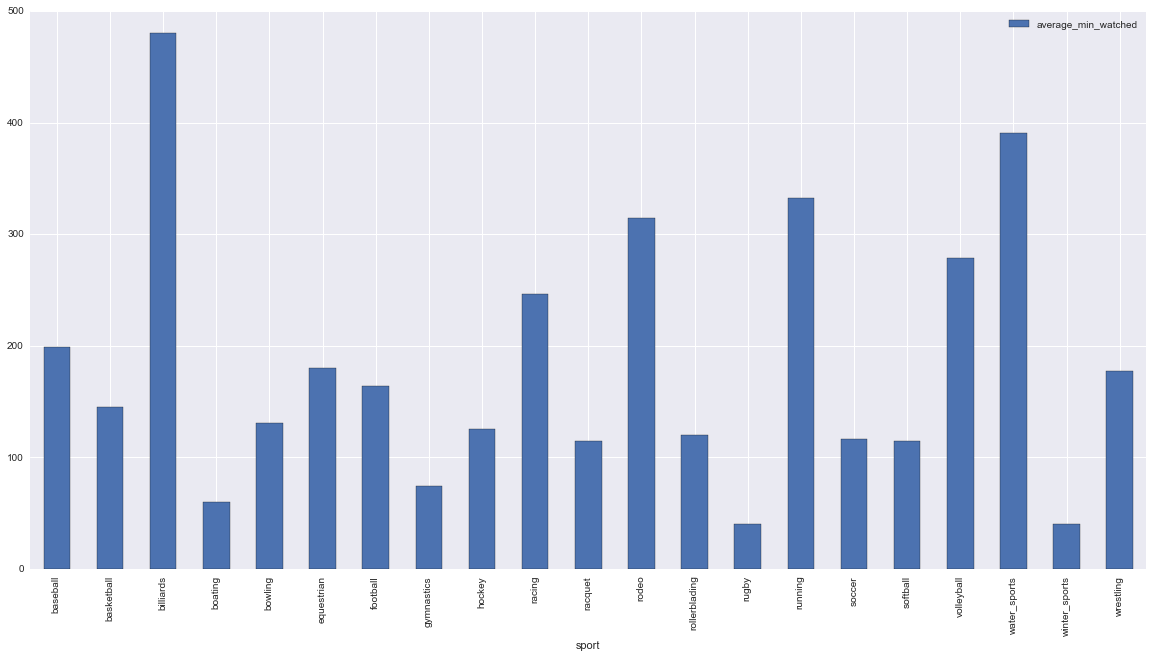

In [11]:
sportsdf.plot(kind = "bar", figsize = (20,10))